Quantum Chemistry in Python
===============

In this lesson we will explore how to perform Quantum Chemistry computations from Python, as well as several data science applications within the field of quantum chemistry.  To do this, we will utilize the quantum chemistry package Psi4, which has a Python front end and API, as well as several Python libraries for data analysis, visualization, and machine learning. 

## Quantum Chemistry Basics

In [1]:
# ==> Import libraries <==
import psi4                               # Quantum chemistry package 
import numpy as np                        # Numerical operations
import pandas as pd                       # Data handling
import matplotlib.pyplot as plt           # Plotting & visualization
from utilities.plotting import sapt_bars  # Custom library for fancy plotting

%matplotlib inline

In [4]:
# ==> Example 1: Construct He...He Potential Curve <==

# Define atomic coordinates for He dimer
He_dimer = """
0 1
He 0 0 0    # First He at the origin
--
He 0 0 {}   # Other He displaced along z-axis

units angstrom
"""

psivariables = {}

# Iterate over He...He separation distances in z axis
for r in np.arange(2.6, 10, 0.1):
    mol = psi4.geometry(He_dimer.format(r))                      # Create Psi4 molecule with displaced He dimer
    ie = psi4.energy('b3lyp-d3mbj/aug-cc-pvdz', bsse_type='cp')  # Compute CP-corrected interaction energy
    psivariables[r] = psi4.core.variables()                      # Save Psi4 internal variables

pvdf = pd.DataFrame(data=psivariables).T # Store Psi4 internal variables inside Pandas DataFrame
pvdf *= psi4.constants.hartree2kcalmol   # Convert energy units from atomic units (Hartree) to kcal/mol

Text(0, 0.5, 'Interaction Energy (kcal/mol)')

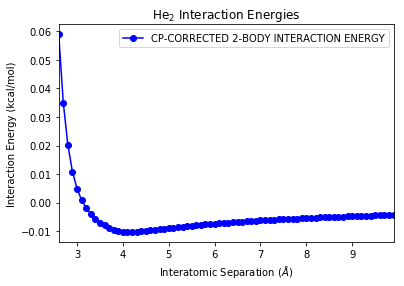

In [23]:
# ==> Plot IE curve directly from Pandas <==
plot_options = {'style': 'bo-',
                'title': 'He$_2$ Interaction Energies',
                'legend': True
               }

pvdf['CP-CORRECTED 2-BODY INTERACTION ENERGY'].plot(**plot_options)
plt.xlabel('Interatomic Separation ($\AA$)')
plt.ylabel('Interaction Energy (kcal/mol)')